In [182]:
import random
import SimLight as sl
import SimLight.plottools as slpl

In [183]:
wavelength = 0.633  # µm
size = 25.4  # mm
res = 500  # pixel number
f = 50  # mm
j = 15
A = 0.3
a = 0.25
random.seed(213838811)

In [184]:
F1 = sl.PlaneWave(wavelength, size, res)
L = sl.Lens.new_lens(size, f)

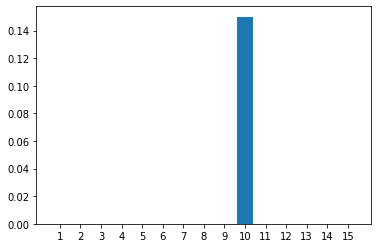

In [185]:
Z1 = sl.zernike.ZernikeCofficients(j)
Z1.cofficients[5] = 1 * A
Z1.cofficients[8] = 0.2 * A
Z1.cofficients[9] = 0.5 * A
Z1.show_coefficients()

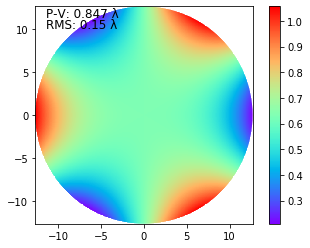

In [186]:
F2 = sl.aberration(F1, Z1)
F2.plot_wavefront(dimension=2, mask_r=1)

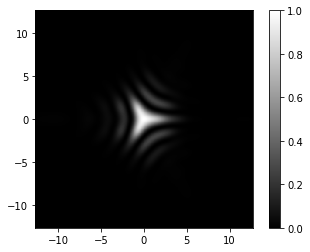

In [187]:
F22 = sl.circle_aperture(F2)
F22 = sl.near_field_propagation(F22, L, f)
F22.plot_intensity(dimension=2, norm_type=1)

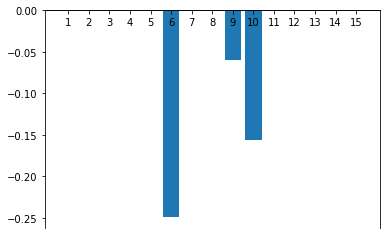

In [188]:
Z2 = sl.zernike.ZernikeCofficients(j)
Z2.cofficients[5] = -1 * A * (1 + random.uniform(-a, a))
Z2.cofficients[8] = -0.2 * A * (1 + random.uniform(-a, a))
Z2.cofficients[9] = -0.5 * A * (1 + random.uniform(-a, a))
Z2.show_coefficients()

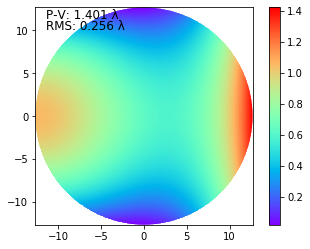

In [189]:
F3 = sl.aberration(F2, Z2)
F3.plot_wavefront(dimension=2, mask_r=1)

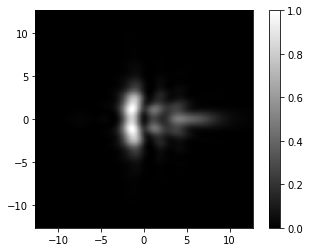

In [190]:
F33 = sl.circle_aperture(F3)
F33 = sl.near_field_propagation(F33, L, f)
F33.plot_intensity(dimension=2, norm_type=1)